In [204]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, pairwise
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline 
import matplotlib.pylab as plt

from pathlib import Path # to interact with file system.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz

In [207]:
#load the dataset
churn_df = pd.read_csv('Data_Science_Challenge.csv',header = 0) #, encoding = "ISO-8859-1")
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [208]:
churn_df.shape # Display the number of rows and columns

(3333, 21)

In [209]:
churn_df.columns = [s.strip().replace(' ', '_') for s in churn_df.columns]
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [210]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [211]:
print(churn_df.isnull().sum())

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


## There are NO Missing Values in the data set.

## But we observe that 'state', 'phone_number', 'international_plan', 'voice_mail_plan' are objects so we convert them to variables.

In [212]:
churn_df['state'] = churn_df['state'].astype('category')
churn_df['international_plan'] = churn_df['international_plan'].astype('category')
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].astype('category')
churn_df['churn'] = churn_df['churn'].astype('category')
print(churn_df.state.cat.categories)
print(churn_df.international_plan.cat.categories)
print(churn_df.voice_mail_plan.cat.categories)
print(churn_df.churn.cat.categories) #Converting state, international_plan, voice_mail_plan and churn datatype as categorical varibales

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object')
Index(['no', 'yes'], dtype='object')
Index(['no', 'yes'], dtype='object')
Index([False, True], dtype='object')


In [213]:
churn_df.dtypes

state                     category
account_length               int64
area_code                    int64
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                     category
dtype: object

## Now the data is perfect for Visualization. So we start by creating Dummies.

In [214]:
#create dummies for categorical data
churn_df = pd.get_dummies(churn_df, prefix=['international_plan','voice_mail_plan', 'churn'], columns=['international_plan','voice_mail_plan', 'churn'], drop_first=True)
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'international_plan_yes',
       'voice_mail_plan_yes', 'churn_True'],
      dtype='object')

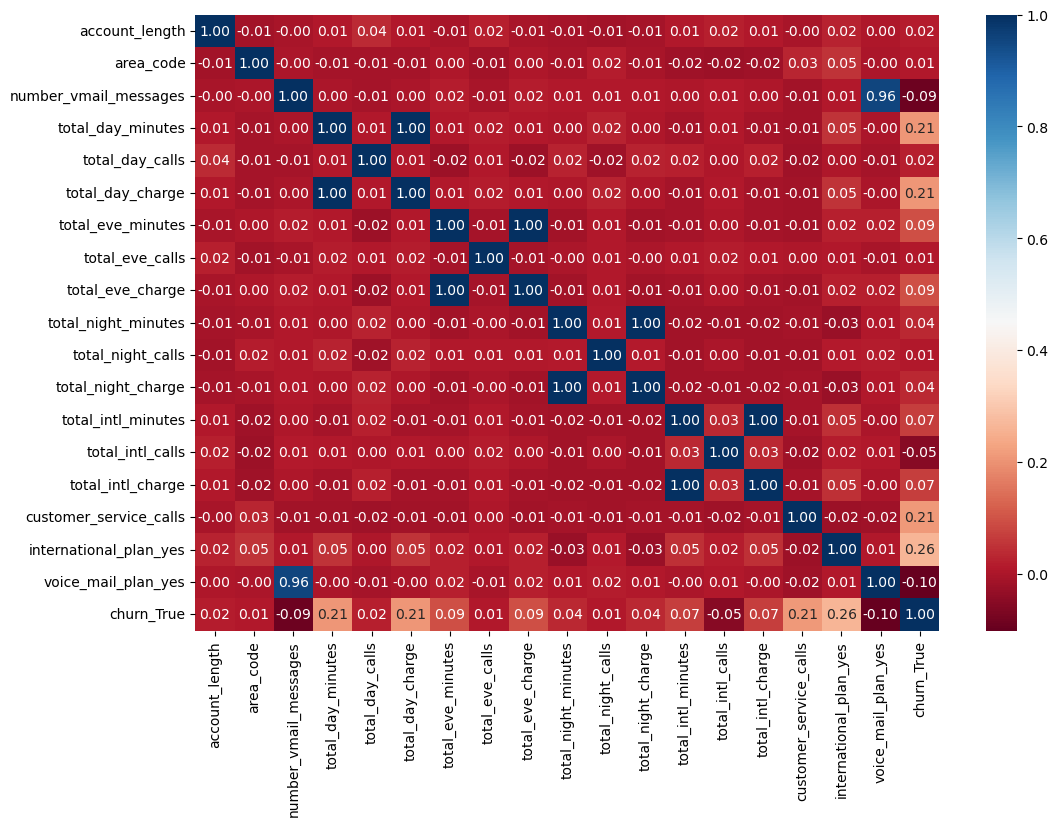

In [215]:
corr = churn_df.corr()
plt.figure(figsize=(12, 8))  #figure size
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

## Observing from the HeatMap we can examine that it does not provide strong information that could talk about the variables highly correlating with each other. The strong correations shown on the heat map are just self explanatory and cannot be taken into consideration since it shows correation between dependent variables. Hence we can say that there is no Multicollinearity present in the dataset.


## Since we could not find any correlating data using the heatmaps we can start analysing variables like 'total_day_minutes' and 'customer_service_calls', 'total_day_charge' alongside churn which might give out some hints on the churning of the customers.


## Lets start by plotting Boxplots

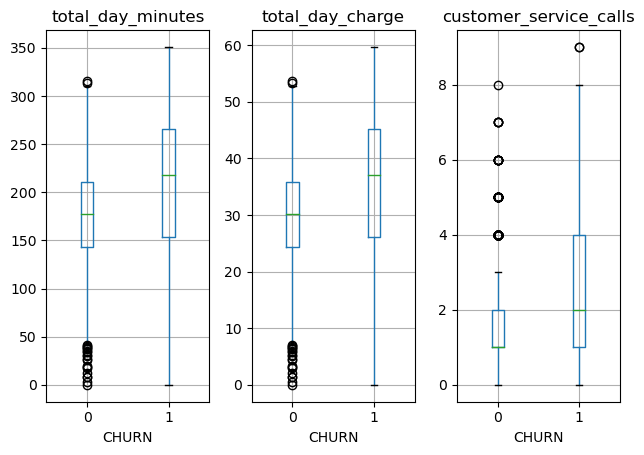

In [216]:
fig, axes = plt.subplots(nrows=1, ncols=3)
churn_df.boxplot(column='total_day_minutes', by='churn_True', ax=axes[0])
churn_df.boxplot(column='total_day_charge', by='churn_True', ax=axes[1])
churn_df.boxplot(column='customer_service_calls', by='churn_True', ax=axes[2])

for ax in axes:
    ax.set_xlabel('CHURN')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

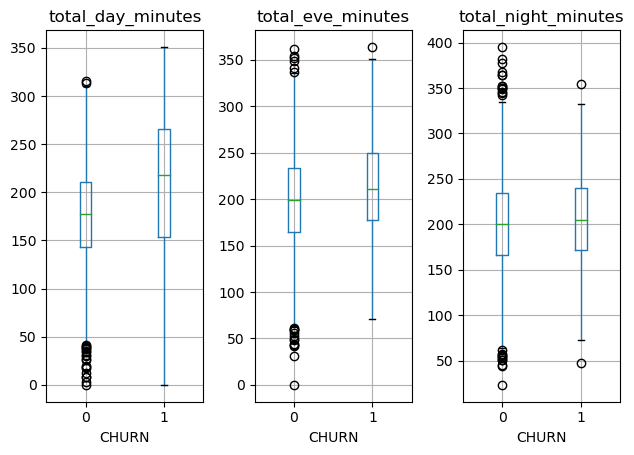

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=3)
churn_df.boxplot(column='total_day_minutes', by='churn_True', ax=axes[0])
churn_df.boxplot(column='total_eve_minutes', by='churn_True', ax=axes[1])
churn_df.boxplot(column='total_night_minutes', by='churn_True', ax=axes[2])

for ax in axes:
    ax.set_xlabel('CHURN')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## The most important information that could be extracted from this boxplot is that the customers who churned had high number of customer service calls. This shows that they had several complains or issues that they wanted to be resolved

## Another relevent observation might be that the customers who churned paid more than the average because they talked for more minutes. This is a relevent information to capture because it might be the case that other telecom companies might provide unlimited plans for the customers who want to make more calls with more duration for a particular price and our telecom company might just charge based on the minutes.

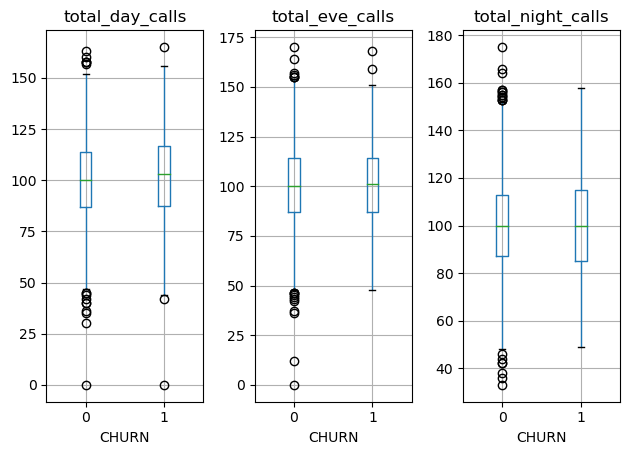

In [218]:
fig, axes = plt.subplots(nrows=1, ncols=3)
churn_df.boxplot(column='total_day_calls', by='churn_True', ax=axes[0])
churn_df.boxplot(column='total_eve_calls', by='churn_True', ax=axes[1])
churn_df.boxplot(column='total_night_calls', by='churn_True', ax=axes[2])

for ax in axes:
    ax.set_xlabel('CHURN')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## The above boxplot shows relevent information if we examine the outliers closely we notice that there are customers talk way above the average for who have made more than 150 calls but they dont churn. Same is the case with the customers who have made below 50 calls. This shows that they are quite satisfied. So the problem lies within the customers who made average number of calls.

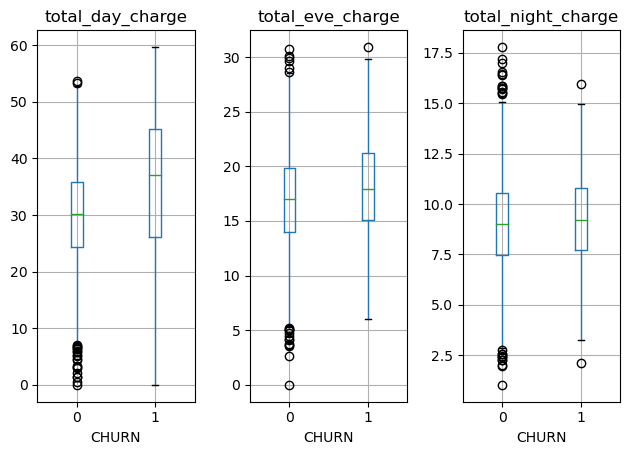

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=3)
churn_df.boxplot(column='total_day_charge', by='churn_True', ax=axes[0])
churn_df.boxplot(column='total_eve_charge', by='churn_True', ax=axes[1])
churn_df.boxplot(column='total_night_charge', by='churn_True', ax=axes[2])

for ax in axes:
    ax.set_xlabel('CHURN')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

## On the other hand we also observe that the customers who churned talked more during the day although they had same amount of calls but the duration in minutes was longer for them. From this boxplot we also observe that the customers who made the calls during the day who paid more than 35 were more likely to churn.

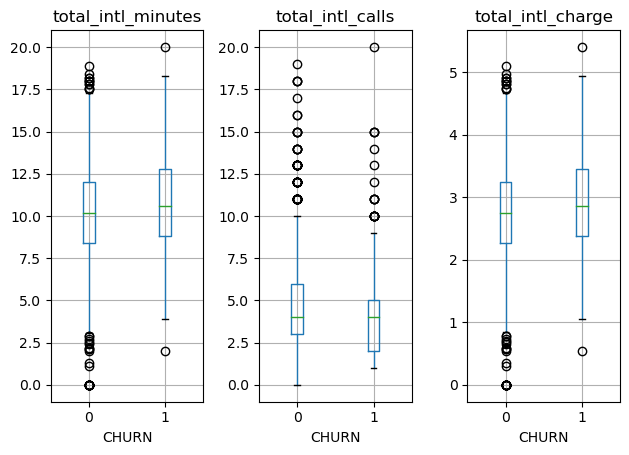

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=3)
churn_df.boxplot(column='total_intl_minutes', by='churn_True', ax=axes[0])
churn_df.boxplot(column='total_intl_calls', by='churn_True', ax=axes[1])
churn_df.boxplot(column='total_intl_charge', by='churn_True', ax=axes[2])

for ax in axes:
    ax.set_xlabel('CHURN')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

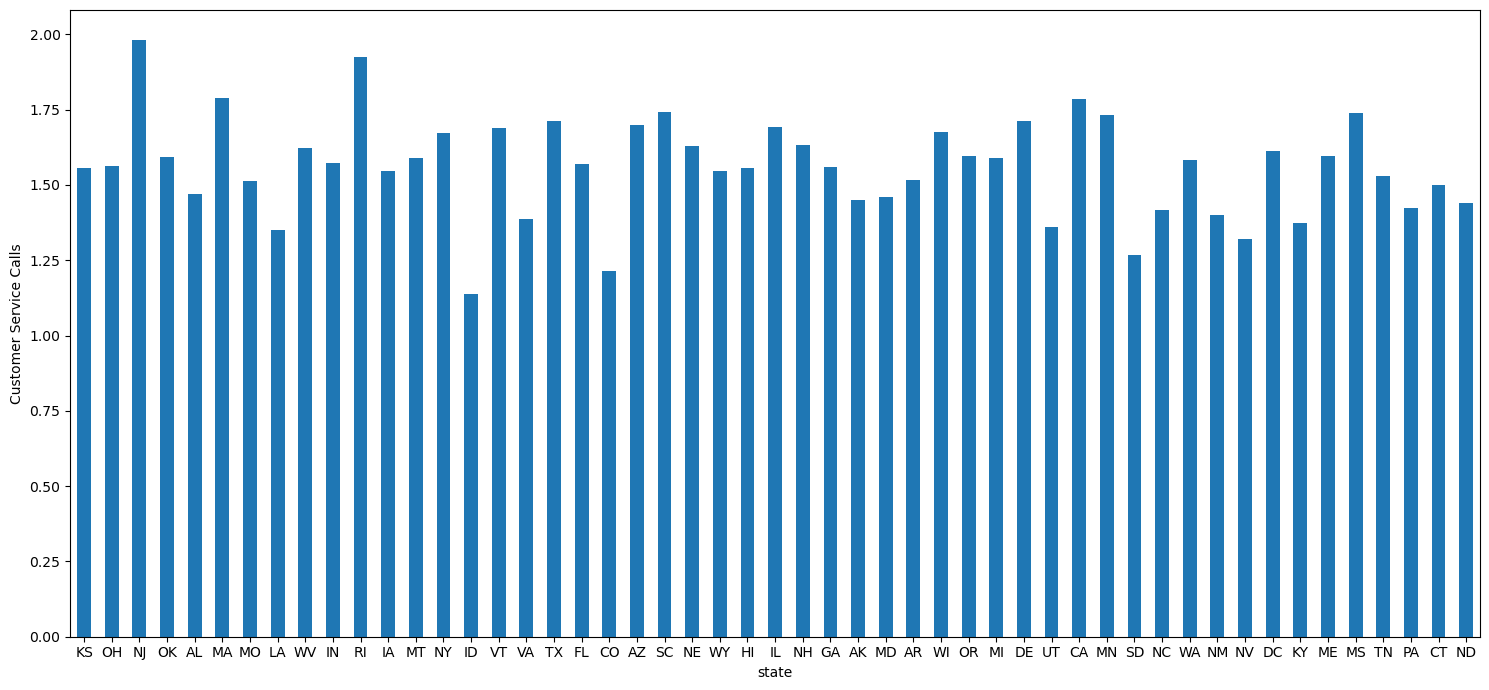

In [221]:
ax = churn_df.groupby('state').mean().customer_service_calls.plot(kind='bar', figsize=[15, 7])

ax.set_ylabel('Customer Service Calls')
ax.set_xlabel('state')  # Set x-axis label
ax.set_xticklabels(churn_df['state'].unique(), rotation=0)  # Set state labels

plt.tight_layout()
plt.show()

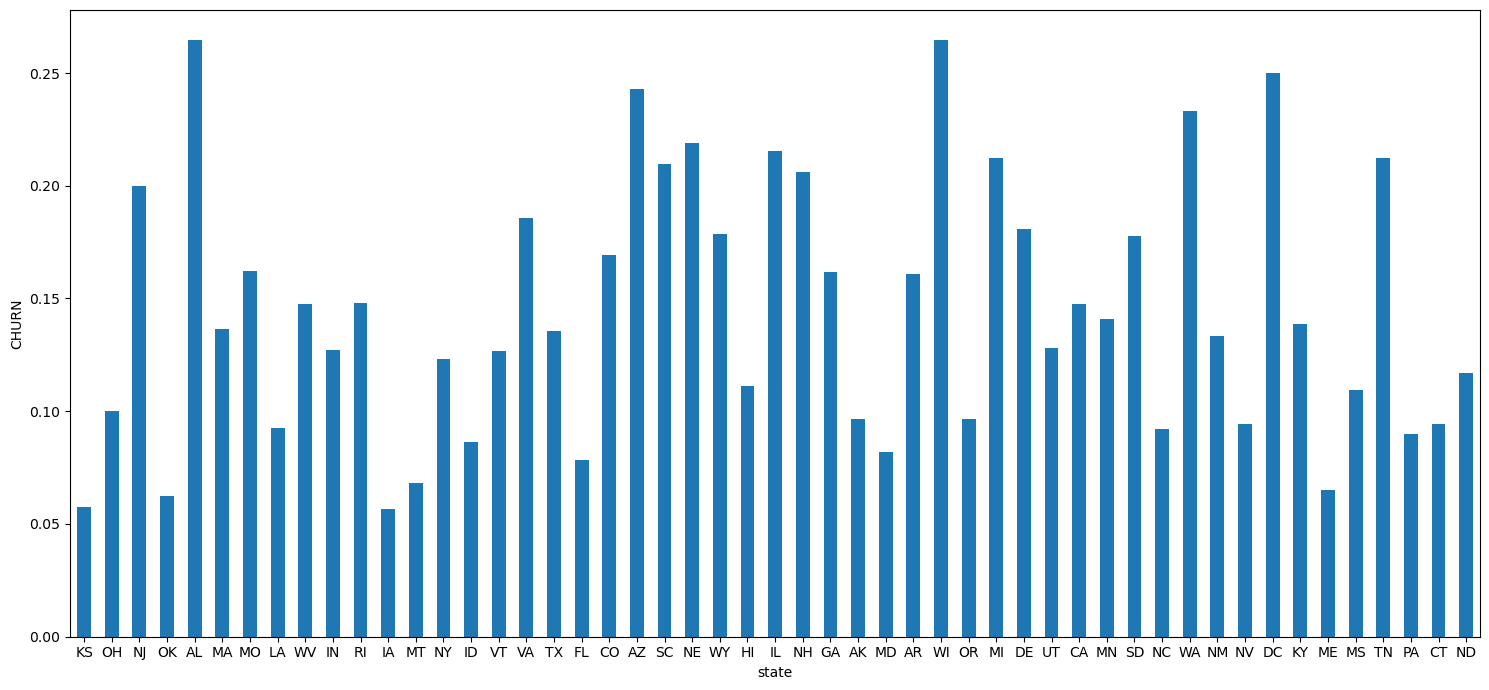

In [222]:
ax = churn_df.groupby('state').mean().churn_True.plot(kind='bar', figsize=[15, 7])

ax.set_ylabel('CHURN')
ax.set_xlabel('state')  # Set x-axis label
ax.set_xticklabels(churn_df['state'].unique(), rotation=0)  # Set state labels

plt.tight_layout()
plt.show()

## From these two Barcharts we can observe that the churning rate was much higher in the states of NJ, AL, AZ, WI, WA and DC. On the other hand it was impressively low in KS, OK, IA, MT, and ME.

## Another Relevent observtion is that although customer service calls were more in the states of OK and RI and many more the problem was observed to be solved because these customers did not churn resulting in low churning rates from these states.

## While if we examine states like AZ, AL, WI, WA, DC and TN we see that there are high chances that the customer service requirements were not met and most likely decided to churn.

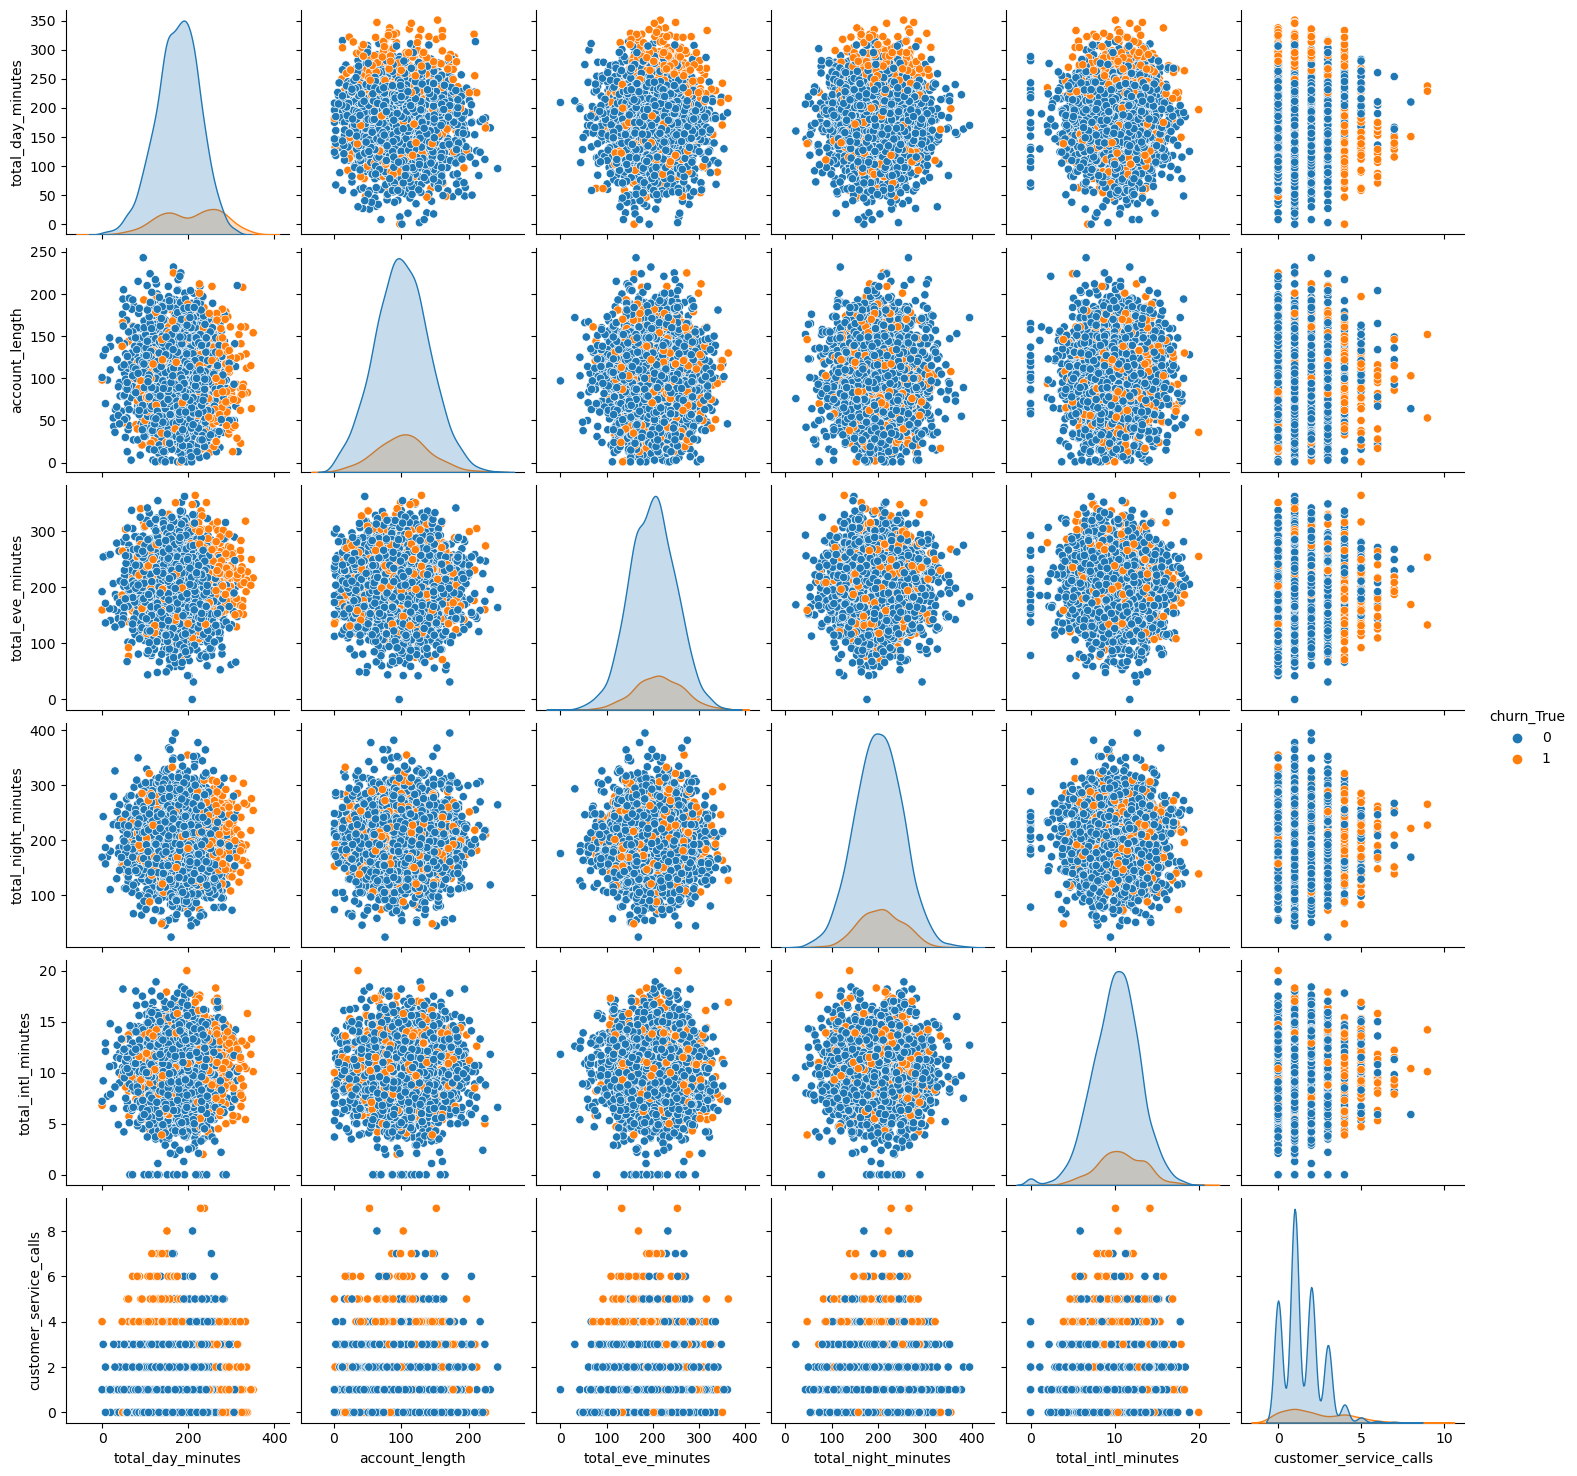

In [223]:
sns.pairplot(churn_df[['total_day_minutes', 'account_length', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'customer_service_calls', 'churn_True']], hue='churn_True')
plt.show()

## The Above scatter plot confirms that the problems mainly arises with the customers who talk for long durations especially during the day i.e. the customers who are heavy daytime users.

## visualization ends here

In [107]:
churn_df = pd.read_csv('Data_Science_Challenge.csv',header = 0) #, encoding = "ISO-8859-1")
churn_df.head() #Display the top five rows of the dataframe

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [108]:
churn_df['churn'] = churn_df['churn'].astype(str).str.lower().map({'true': 1, 'false': 0})


In [109]:
churn_df.head() # Display the number of rows and columns

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Cleanup of the data

In [110]:
churn_df.columns #Display the column names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [111]:
churn_df.columns = [s.strip().replace(' ', '_') for s in churn_df.columns]
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [112]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

We can observed that, there are no missing values in the dataset

In [113]:
print(churn_df.isnull().sum())

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [114]:
np.round(churn_df.describe(), decimals=2)

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [115]:
churn_df['state'] = churn_df['state'].astype('category')
churn_df['international_plan'] = churn_df['international_plan'].astype('category')
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].astype('category')
churn_df['churn'] = churn_df['churn'].astype('category')
print(churn_df.state.cat.categories)
print(churn_df.international_plan.cat.categories)
print(churn_df.voice_mail_plan.cat.categories)
print(churn_df.churn.cat.categories) #Converting state, international_plan, voice_mail_plan and churn datatype as categorical varibales

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object')
Index(['no', 'yes'], dtype='object')
Index(['no', 'yes'], dtype='object')
Int64Index([0, 1], dtype='int64')


In [116]:
churn_df.dtypes

state                     category
account_length               int64
area_code                    int64
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                     category
dtype: object

## plotting the count of Churn (True and False)

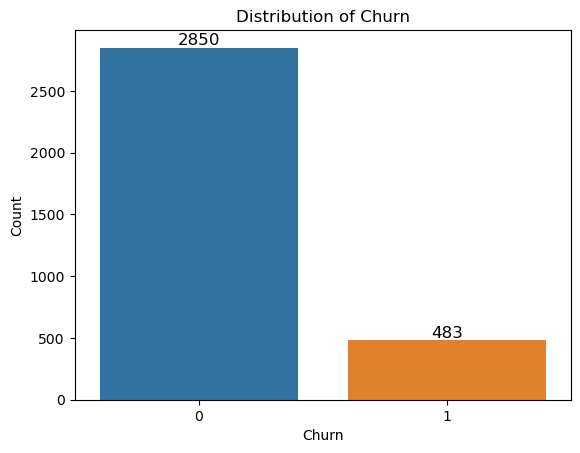

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
ax = sns.countplot(x='churn', data=churn_df)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [118]:
# making some copies of the final dataframe to be used for other methods (trees and Logistic regression)
churn_df2 = churn_df 
churn_df3 = churn_df

In [121]:
churn_df3.shape

(3333, 21)

## Trying KNN first

KNN Model & Classification Trees

In [122]:
churn_df.shape

(3333, 21)

In [123]:
churn_df.dtypes

state                     category
account_length               int64
area_code                    int64
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                     category
dtype: object

## first making a model by not including State, as there are so many categories in this column

we can drop state, area_code and phone_number columns 

In [124]:
#Creating model for predictors
predictors= ['account_length',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']
outcome = ['churn']

# partition data
X = pd.get_dummies(churn_df[predictors], drop_first=True)
y = churn_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) #training data 70% and validation data 30%

In [125]:
X

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1,0


In [126]:
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [127]:
#Normalize the dataset using StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
valid_X = sc.transform(valid_X)
print(train_X)

[[-0.03706973 -0.57650767 -2.31685332 ... -0.42633947 -0.31860769
  -0.60161293]
 [ 0.58637088 -0.57650767  0.24807892 ... -1.1827273  -0.31860769
  -0.60161293]
 [-0.26150835 -0.57650767  0.76401356 ...  0.33004835 -0.31860769
  -0.60161293]
 ...
 [-0.18669548 -0.57650767 -1.51346938 ... -0.42633947 -0.31860769
  -0.60161293]
 [ 0.96043524 -0.57650767 -0.85012483 ...  2.59921184 -0.31860769
  -0.60161293]
 [ 0.78587187  1.69506761 -0.11123271 ... -0.42633947 -0.31860769
   1.66219831]]


In [128]:
train_X = pd.DataFrame(train_X, columns=X.columns)
train_X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,-0.037070,-0.576508,-2.316853,-0.419491,-2.316497,-0.550812,0.158921,-0.549703,-0.117562,1.277071,-0.117372,-0.987351,-0.609510,-0.981366,-0.426339,-0.318608,-0.601613
1,0.586371,-0.576508,0.248079,0.122765,0.248018,0.797779,0.815228,0.798884,0.520995,2.687370,0.522045,0.599572,0.217948,0.594882,-1.182727,-0.318608,-0.601613
2,-0.261508,-0.576508,0.764014,-0.370195,0.763956,-0.273161,0.158921,-0.272053,1.601023,1.226704,1.599417,0.779904,0.631677,0.781894,0.330048,-0.318608,-0.601613
3,-1.508390,-0.576508,-1.821188,1.108684,-1.821153,0.186947,0.411347,0.187587,0.215512,-1.795365,0.215475,0.383173,-0.609510,0.381153,3.355600,-0.318608,-0.601613
4,-0.136820,2.281281,1.478952,1.453756,1.479332,0.250410,0.562802,0.250583,-0.107708,-0.133228,-0.108612,-0.049624,0.217948,-0.046304,-0.426339,-0.318608,1.662198


In [129]:
valid_X = pd.DataFrame(valid_X, columns=X.columns)
valid_X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,-0.810136,-0.576508,0.765856,0.319948,0.766124,-0.027241,0.108436,-0.027067,-0.762031,0.370451,-0.761167,-0.302089,-0.609510,-0.300106,0.330048,-0.318608,-0.601613
1,0.037743,-0.576508,-1.436079,-0.567379,-1.436367,0.896941,-1.153693,0.896878,-0.602392,2.032589,-0.603503,-0.410288,-0.195781,-0.406970,0.330048,-0.318608,-0.601613
2,-0.710386,-0.576508,1.692696,-0.616675,1.692861,-1.841891,1.269595,-1.842293,-0.306764,-0.939113,-0.305693,0.888103,-1.023239,0.888758,-1.182727,-0.318608,-0.601613
3,0.187369,0.522642,-0.284439,-0.764563,-0.284178,1.313417,-0.345930,1.314520,0.978233,0.723025,0.977519,0.238907,-0.195781,0.234215,-0.426339,-0.318608,1.662198
4,-1.209138,-0.576508,0.629502,-1.602595,0.629552,-0.836397,1.925902,-0.836686,-1.530664,0.723025,-1.531971,-0.302089,-0.195781,-0.300106,0.330048,-0.318608,-0.601613


In [130]:
#Develop kNN model with 3 neighbors and testing accuracy on validation data
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X.values))

Confusion Matrix (Accuracy 0.8890)

       Prediction
Actual   0   1
     0 834  21
     1  90  55


## the base model of KNN  without state is giving us an accuracy of 88.9% on the validation data

In [131]:
# Find the best k from 1 to 50
results = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X.values))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.868
1    2     0.875
2    3     0.889
3    4     0.887
4    5     0.892
5    6     0.891
6    7     0.891
7    8     0.883
8    9     0.888
9   10     0.882
10  11     0.889
11  12     0.884
12  13     0.881
13  14     0.878
14  15     0.888
15  16     0.877
16  17     0.877
17  18     0.875
18  19     0.876
19  20     0.876
20  21     0.877
21  22     0.876
22  23     0.879
23  24     0.876
24  25     0.878
25  26     0.873
26  27     0.875
27  28     0.872
28  29     0.874
29  30     0.873
30  31     0.875
31  32     0.873
32  33     0.874
33  34     0.873
34  35     0.873
35  36     0.871
36  37     0.872
37  38     0.870
38  39     0.871
39  40     0.870
40  41     0.872
41  42     0.871
42  43     0.872
43  44     0.870
44  45     0.871
45  46     0.870
46  47     0.870
47  48     0.868
48  49     0.870


## we can see from the above table that k=5 is giving us the best accuracy of 89.2 on the validation data

In [132]:
#model with best k, we are moving with k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X.values))

Confusion Matrix (Accuracy 0.8920)

       Prediction
Actual   0   1
     0 839  16
     1  92  53


## Now, lets repeat the process by including state variable also, and we will repeat the same process to see if the accuracy increased or not

In [133]:
churn_df.shape

(3333, 21)

In [134]:
#Creating model for predictors
predictors= ['state','account_length',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']
outcome = ['churn']

# partition data
X = pd.get_dummies(churn_df[predictors], drop_first=True)
y = churn_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) #training data 70% and validation data 30%

#Normalize the dataset using StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
valid_X = sc.transform(valid_X)
#print(train_X)
train_X = pd.DataFrame(train_X, columns=X.columns)
valid_X = pd.DataFrame(valid_X, columns=X.columns)


#Develop kNN model with 3 neighbors and testing accuracy on validation data
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X.values))


Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual   0   1
     0 843  12
     1 123  22


## the accuracy rather dropped from 88% to 86% by including state

# #Now trying another model  using KNN with fewer parameters

In [135]:

#Creating model for predictors
predictors= ['international_plan', 'number_vmail_messages','voice_mail_plan','total_day_charge','total_eve_charge',
       'total_night_charge','total_intl_charge'] 
outcome = ['churn']

# partition data
X = pd.get_dummies(churn_df[predictors], drop_first=True)
y = churn_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1) #training data 70% and validation data 30%

#Normalize the dataset using StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
valid_X = sc.transform(valid_X)
#print(train_X)
train_X = pd.DataFrame(train_X, columns=X.columns)
valid_X = pd.DataFrame(valid_X, columns=X.columns)


#Develop kNN model with 3 neighbors and testing accuracy on validation data
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X.values))


Confusion Matrix (Accuracy 0.8910)

       Prediction
Actual   0   1
     0 829  26
     1  83  62


## A parsimonious model with just 7 predictors is giving us an accuracy of 89.1% on the validation data

In [136]:
## lets see the best k for this model
# Find the best k from 1 to 50
results = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X.values))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.845
1    2     0.895
2    3     0.891
3    4     0.895
4    5     0.892
5    6     0.894
6    7     0.898
7    8     0.895
8    9     0.901
9   10     0.900
10  11     0.898
11  12     0.899
12  13     0.903
13  14     0.898
14  15     0.901
15  16     0.897
16  17     0.899
17  18     0.895
18  19     0.895
19  20     0.896
20  21     0.896
21  22     0.895
22  23     0.894
23  24     0.894
24  25     0.893
25  26     0.890
26  27     0.890
27  28     0.890
28  29     0.891
29  30     0.890
30  31     0.893
31  32     0.890
32  33     0.891
33  34     0.890
34  35     0.893
35  36     0.889
36  37     0.891
37  38     0.888
38  39     0.889
39  40     0.887
40  41     0.890
41  42     0.886
42  43     0.889
43  44     0.882
44  45     0.882
45  46     0.879
46  47     0.882
47  48     0.879
48  49     0.882


## we are quite happy with our results, the parsimonious model with k = 9 is giving us an accuracy of 90.1% on the validation data

In [137]:
#model with best k, we are moving with k = 9
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(train_X, train_y)
classificationSummary(valid_y, knn_model.predict(valid_X.values))

Confusion Matrix (Accuracy 0.9010)

       Prediction
Actual   0   1
     0 842  13
     1  86  59


## KNN finished here, accuracy of 90.1% of overall accuracy on validation data!! 

## Now, lets try some decision trees

# Decision Tree starts

In [138]:
churn_df2.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [139]:
churn_df2.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [141]:
numerical_predictors = churn_df2.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_predictors = churn_df2.select_dtypes(include=['category']).columns.tolist()

print("Numerical Predictors:")
print(numerical_predictors)

print("\nCategorical Predictors:")
print(categorical_predictors)


Numerical Predictors:
['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

Categorical Predictors:
['state', 'international_plan', 'voice_mail_plan', 'churn']


## using all predictors to create the classification tree, coding the text categories into numbers

In [142]:
from sklearn.preprocessing import OrdinalEncoder

# Extracting all columns except 'Competitive?'
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 
                  'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
                  'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 
                  'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

categorical_cols = ['state', 'international_plan', 'voice_mail_plan']
predictor_cols = numerical_cols + categorical_cols  # Define the order of columns for the final DataFrame

# Copying the dataframe with only the categorical columns
X_categorical = churn_df2[categorical_cols].copy()

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Transform the categorical columns
X_encoded = ordinal_encoder.fit_transform(X_categorical)

# Create a DataFrame with encoded categorical columns and selected numerical columns
df_numerical = churn_df2[numerical_cols]
df_final = pd.concat([df_numerical, pd.DataFrame(X_encoded, columns=categorical_cols)], axis=1)

# Add 'churn' column to the end
df_final['churn'] = churn_df2['churn']

# Rearrange columns to place 'Competitive?' at the end
df_final = df_final[predictor_cols + ['churn']]

df_final.head(5)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,state,international_plan,voice_mail_plan,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,16.0,0.0,1.0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,35.0,0.0,1.0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,31.0,0.0,0.0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35.0,1.0,0.0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36.0,1.0,0.0,0


## Seeing how the categories are coded

In [143]:
# Access the categories and their respective encoded values
encoded_categories = ordinal_encoder.categories_
for i, col in enumerate(categorical_cols):
    print(f"Column '{col}' categories and encoded values:")
    for j, category in enumerate(encoded_categories[i]):
        print(f"Category '{category}' is encoded as {j}")
    print()

Column 'state' categories and encoded values:
Category 'AK' is encoded as 0
Category 'AL' is encoded as 1
Category 'AR' is encoded as 2
Category 'AZ' is encoded as 3
Category 'CA' is encoded as 4
Category 'CO' is encoded as 5
Category 'CT' is encoded as 6
Category 'DC' is encoded as 7
Category 'DE' is encoded as 8
Category 'FL' is encoded as 9
Category 'GA' is encoded as 10
Category 'HI' is encoded as 11
Category 'IA' is encoded as 12
Category 'ID' is encoded as 13
Category 'IL' is encoded as 14
Category 'IN' is encoded as 15
Category 'KS' is encoded as 16
Category 'KY' is encoded as 17
Category 'LA' is encoded as 18
Category 'MA' is encoded as 19
Category 'MD' is encoded as 20
Category 'ME' is encoded as 21
Category 'MI' is encoded as 22
Category 'MN' is encoded as 23
Category 'MO' is encoded as 24
Category 'MS' is encoded as 25
Category 'MT' is encoded as 26
Category 'NC' is encoded as 27
Category 'ND' is encoded as 28
Category 'NE' is encoded as 29
Category 'NH' is encoded as 30
Cat

In [145]:
df_final['state'] = df_final['state'].astype('category')
df_final['international_plan'] = df_final['international_plan'].astype('category')
df_final['voice_mail_plan'] = df_final['voice_mail_plan'].astype('category')
df_final.dtypes
df_final.dtypes

account_length               int64
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
state                     category
international_plan        category
voice_mail_plan           category
churn                     category
dtype: object

In [146]:
df_final.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'state', 'international_plan', 'voice_mail_plan', 'churn'],
      dtype='object')

In [147]:
#Separate X and y variables
predictors =['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'state', 'international_plan', 'voice_mail_plan']
outcome = 'churn'

#Partition
X = df_final[predictors]
y = df_final[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [148]:
train_X.dtypes

account_length               int64
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
state                     category
international_plan        category
voice_mail_plan           category
dtype: object

## creating the tree with maxdepth = 7 and min_samples_split =50

In [149]:
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=7,min_samples_split=50)
classTree1.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree1.predict(train_X))

Confusion Matrix (Accuracy 0.9515)

       Prediction
Actual    0    1
     0 1681   33
     1   64  221


## testing the tree on validation data

In [150]:
classificationSummary(valid_y, classTree1.predict(valid_X))

Confusion Matrix (Accuracy 0.9273)

       Prediction
Actual    0    1
     0 1099   37
     1   60  138


## getting an accuracy of 92.7% on validation data for a naive model with all the predictors

## plotting decision on training data

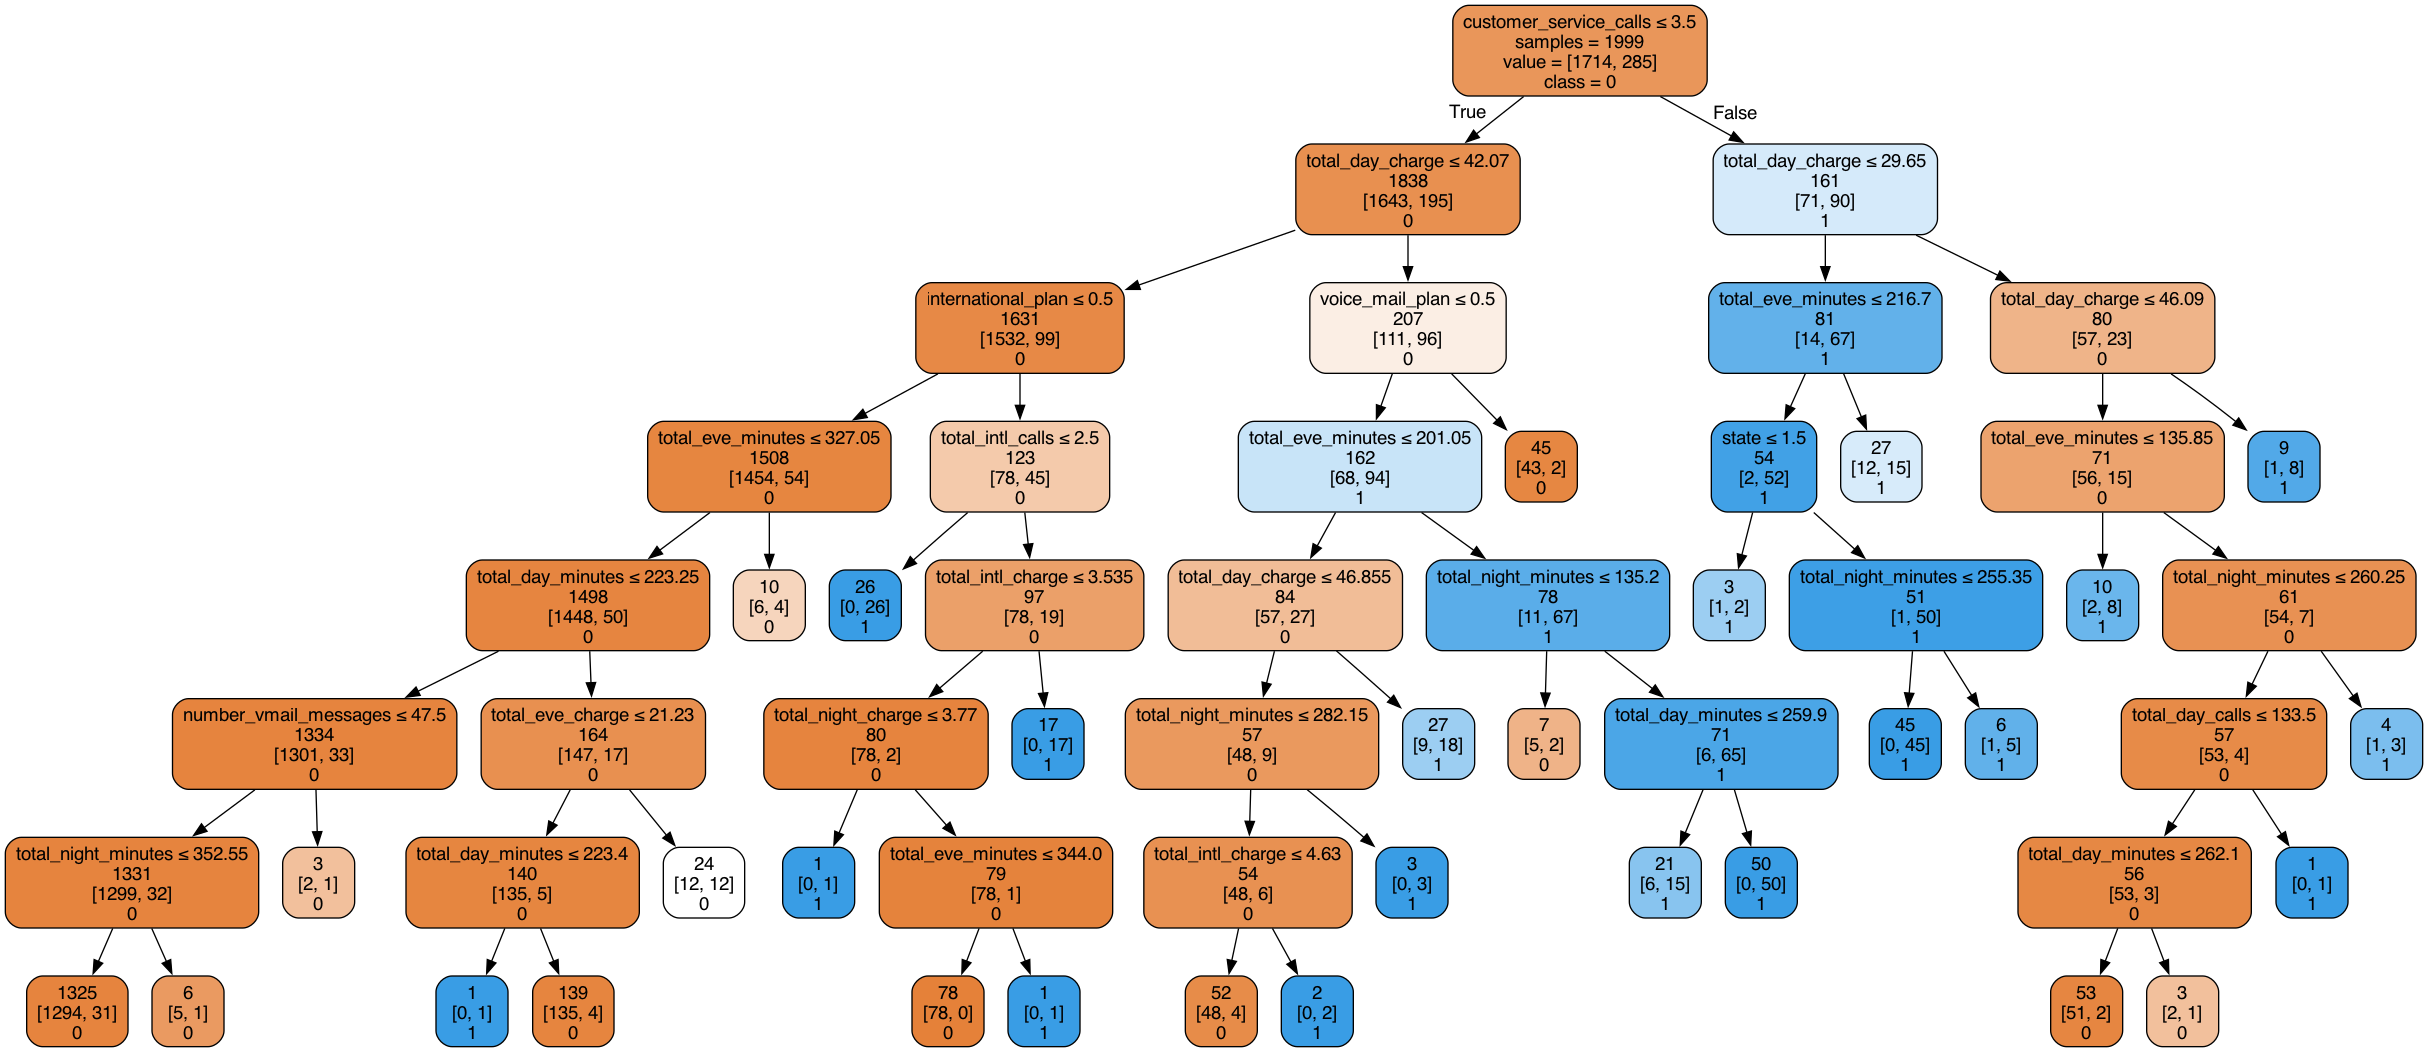

In [151]:
plotDecisionTree(classTree1, feature_names=train_X.columns, class_names=classTree1.classes_)

## now, lets use grid search to improve the accuracy further

In [153]:
#Use grid search for the best parameters
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9349786967418545
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [154]:

# Adapt grid based on result from initial grid search *separate from code above
param_grid = {
    'max_depth': list(range(10,30)), 
    'min_samples_split': list(range(12, 22)), #keeping splits between 12 to 22 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.9384786967418546
Improved parameters:  {'max_depth': 17, 'min_impurity_decrease': 0.0009, 'min_samples_split': 17}


In [156]:
## accuracy improved slightly from 93.4% to 93.8%

In [155]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9333)

       Prediction
Actual    0    1
     0 1103   33
     1   56  142


## Grid search parameters are giving is an oveall accuracy of 93.3% on validation data

## Next, lets try random forest to find the importance of features and then we will try to make a parsimonious model in Classification Trees as well

In [157]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                   feature  importance       std
17         voice_mail_plan    0.024197  0.023285
15                   state    0.025938  0.012915
0           account_length    0.028561  0.013710
9        total_night_calls    0.028784  0.013492
6          total_eve_calls    0.029144  0.012890
1    number_vmail_messages    0.030102  0.023840
3          total_day_calls    0.032070  0.014286
10      total_night_charge    0.035328  0.016086
8      total_night_minutes    0.037232  0.016544
11      total_intl_minutes    0.039246  0.021158
13       total_intl_charge    0.042334  0.021469
12        total_intl_calls    0.045071  0.022850
16      international_plan    0.057732  0.024500
5        total_eve_minutes    0.063407  0.027589
7         total_eve_charge    0.066876  0.027673
2        total_day_minutes    0.133121  0.074275
14  customer_service_calls    0.136048  0.027796
4         total_day_charge    0.144810  0.077745


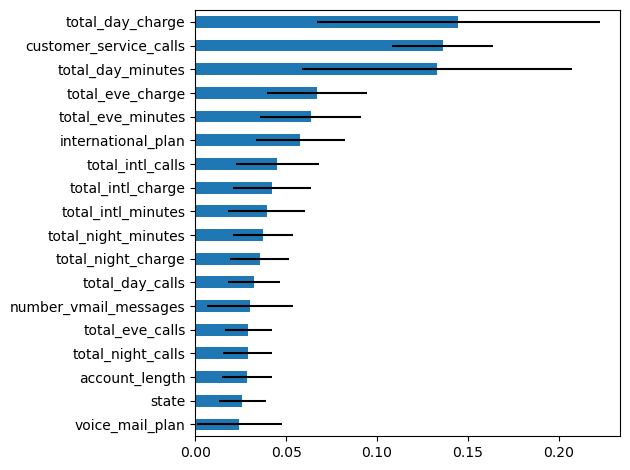

In [158]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [159]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9505)

       Prediction
Actual    0    1
     0 1124   12
     1   54  144


## random forest is giving an accuracy of 95% on the validation data

## Boosted Trees

In [160]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9513)

       Prediction
Actual    0    1
     0 1122   14
     1   51  147


## Boosted trees giving us an accuracy of 95.1% on validation data

## since we have now know the important features, lets make a light model using those top 5 features only, and lets see what would be the accuracy of this model on validation data

In [161]:
df_final.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'state', 'international_plan', 'voice_mail_plan', 'churn'],
      dtype='object')

In [162]:
df_final.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,state,international_plan,voice_mail_plan,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,16.0,0.0,1.0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,35.0,0.0,1.0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,31.0,0.0,0.0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35.0,1.0,0.0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36.0,1.0,0.0,0


In [167]:
#Separate X and y variables
predictors =['total_day_charge','customer_service_calls','total_day_minutes','total_eve_charge','total_eve_minutes']
outcome = 'churn'

#Partition
X = df_final[predictors]
y = df_final[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

classTree1 = DecisionTreeClassifier(random_state=0, max_depth=7,min_samples_split=50)
classTree1.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree1.predict(train_X))

Confusion Matrix (Accuracy 0.9145)

       Prediction
Actual    0    1
     0 1674   40
     1  131  154


In [168]:
classificationSummary(valid_y, classTree1.predict(valid_X))

Confusion Matrix (Accuracy 0.8868)

       Prediction
Actual    0    1
     0 1095   41
     1  110   88


## The parsimonious model with 5 Top predictors is giving us an overall accuracy of 88.68% on the validation data

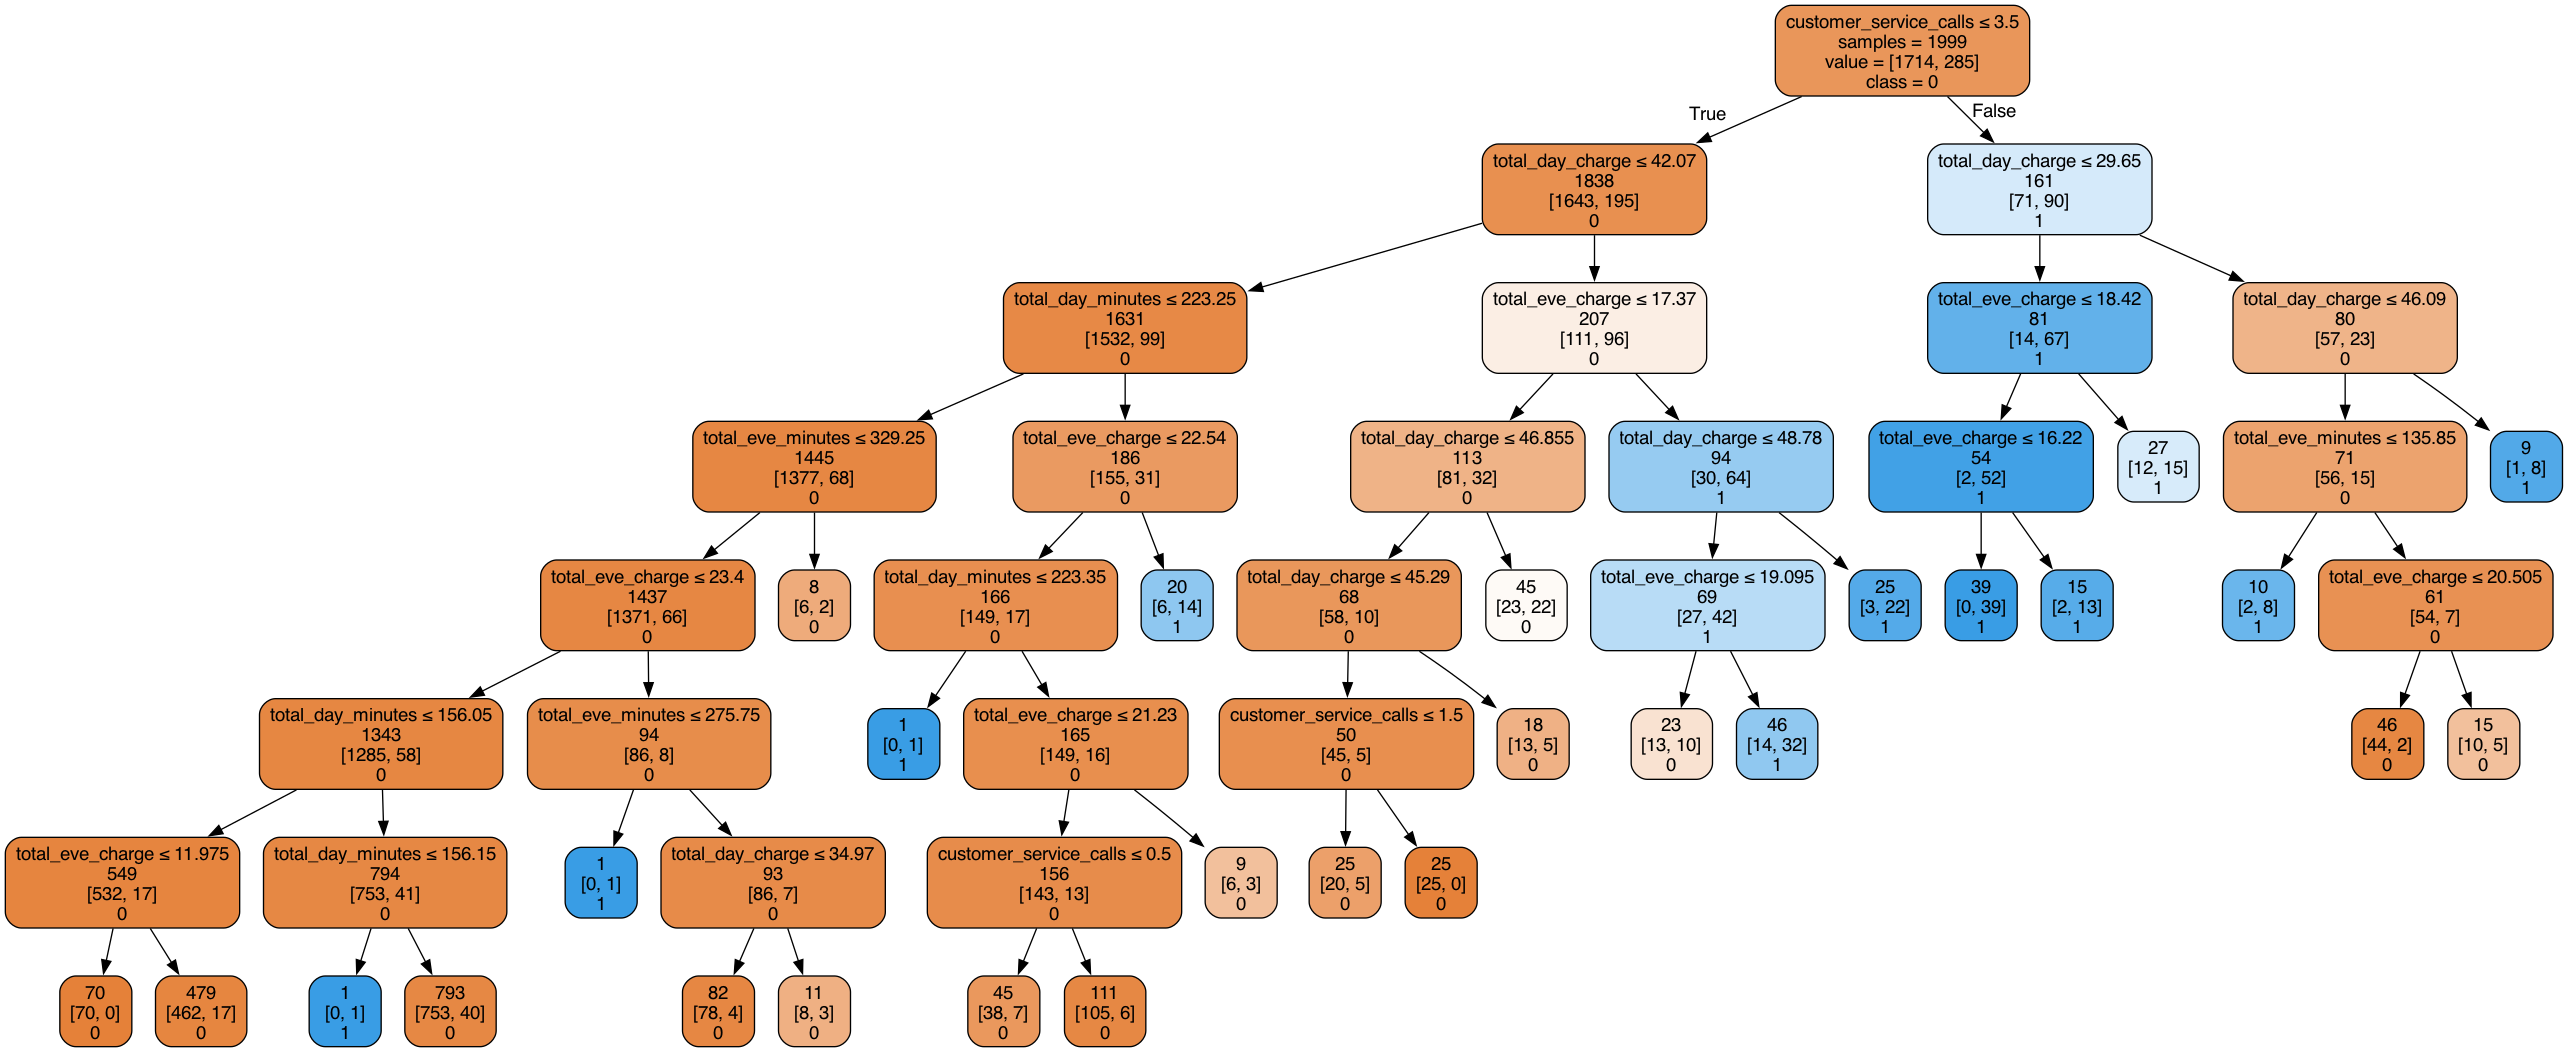

In [169]:
plotDecisionTree(classTree1, feature_names=train_X.columns, class_names=classTree1.classes_)

# Decision Trees end

## Out last ML technique would be Logistic regression 

In [181]:
churn_df3.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [182]:
churn_df3.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

## making a base model with all predictors first

In [183]:
predictors = ['state', 'account_length',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls']
outcome = 'churn'

# partition data
X = pd.get_dummies(churn_df3[predictors], drop_first=True)
y = churn_df3[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [184]:
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger )
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1)) #akaike intuitive criterion - lower the better

intercept  -10.019256754113885
       account_length  number_vmail_messages  total_day_minutes  \
coeff        0.001524               0.023934          -0.038486   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
coeff         0.003205          0.310724           0.008957         0.003016   

       total_eve_charge  total_night_minutes  total_night_calls  ...  \
coeff         -0.024226              0.00439           0.001873  ...   

       state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
coeff  1.750335   0.63953 -1.058372 -0.757711  1.461409 -0.297022  0.433721   

       state_WY  international_plan_yes  voice_mail_plan_yes  
coeff  0.232688                2.210128            -1.715096  

[1 rows x 67 columns]

AIC 1392.3031134467387


In [185]:
#predict in the validation data
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_reg_pred = logit_reg.predict(valid_X)
classificationSummary(valid_y, logit_reg_pred) #testing accuracy on validation data

Confusion Matrix (Accuracy 0.8501)

       Prediction
Actual    0    1
     0 1089   47
     1  153   45


## Naive logistic regression model is giving us an overall accuracy of 85%

In [187]:
#I use a higher cutoff here, so my specificity increses and I identify more 0s
newpred = logit_reg_proba[:,1]>0.6
classificationSummary(valid_y, newpred)

Confusion Matrix (Accuracy 0.8486)

       Prediction
Actual    0    1
     0 1104   32
     1  170   28


## Gains chart and Decile-wise lift chart

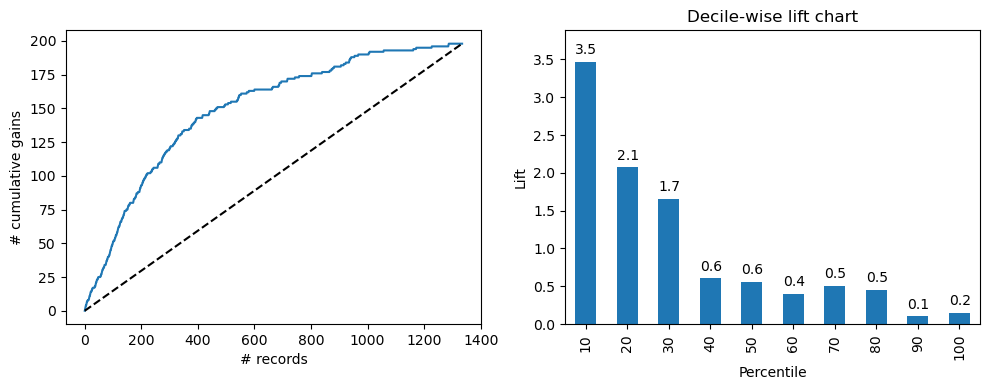

In [198]:
import matplotlib.pyplot as plt

logit_result['actual'] = logit_result['actual'].astype(int)
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])

plt.tight_layout()
plt.show()


## now making another logit regression model with just the top predictors we found in Tree Classifier

In [200]:
predictors = ['total_day_charge','customer_service_calls','total_day_minutes','total_eve_charge','total_eve_minutes']
outcome = 'churn'

# partition data
X = pd.get_dummies(churn_df3[predictors], drop_first=True)
y = churn_df3[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger )
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1)) #akaike intuitive criterion - lower the better

#predict in the validation data
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_reg_pred = logit_reg.predict(valid_X)
classificationSummary(valid_y, logit_reg_pred) #testing accuracy on validation data


intercept  -6.3500427124198735
       total_day_charge  customer_service_calls  total_day_minutes  \
coeff          0.004786                0.498938           0.012628   

       total_eve_charge  total_eve_minutes  
coeff         -0.006303           0.005624  

AIC 1301.2430586422943
Confusion Matrix (Accuracy 0.8463)

       Prediction
Actual    0    1
     0 1120   16
     1  189    9


## This model is giving us an overall accuracy of 84% only

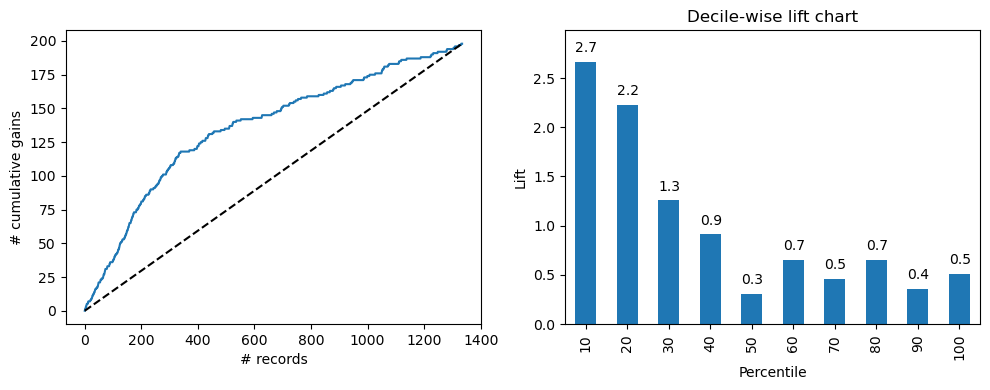

In [201]:
import matplotlib.pyplot as plt

logit_result['actual'] = logit_result['actual'].astype(int)
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])

plt.tight_layout()
plt.show()